<img src="res/Manchester_United_F.C.-Logo.wine.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# 3. Phân tích dữ liệu

Sau khi thu thập và xử lý dữ liệu, chúng ta còn 281 bài viết 
trong khoảng thời gian từ 19/9/2023 đến 14/11/2023 của 
fanpage [Fan Manchester United in Viet Nam](https://www.facebook.com/ManUnitedVN1878)

![purple-divider](res/purple.png)
## Cài đặt

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install wordcloud
%pip install seaborn

![green-divider](res/green.png)
## Nhập dữ liệu

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from wordcloud import WordCloud

In [156]:
df = pd.read_csv("data/posts_data.csv")
df1 = pd.read_csv("data/posts_urls.csv")

![green-divider](res/green.png)
## Kiểm tra lại dữ liệu để tìm dữ liệu bị thiếu.
- **df** là dataframe chứa dữ liệu chính để phân tích, mọi thứ cần phải đầy đủ.
- **df1** là dataframe chứa các link dữ liệu (link post, image, video,...) chỉ mang tính hỗ trợ truy xuất.

In [157]:
df.isna().sum()

post_id               0
post_text             0
date                  0
time                  0
comments              0
shares                0
reactions             0
reaction_count        0
has_image             0
has_video             0
comments_text         0
engagement_summary    0
dtype: int64

In [158]:
df1.isna().sum()

post_id             0
post_url            0
images              0
video             271
commenters_url      0
reactors_url        0
dtype: int64

![green-divider](res/green.png)
## Tổng quan dữ liệu

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             281 non-null    object 
 1   post_text           281 non-null    object 
 2   date                281 non-null    object 
 3   time                281 non-null    object 
 4   comments            281 non-null    float64
 5   shares              281 non-null    float64
 6   reactions           281 non-null    object 
 7   reaction_count      281 non-null    float64
 8   has_image           281 non-null    bool   
 9   has_video           281 non-null    bool   
 10  comments_text       281 non-null    object 
 11  engagement_summary  281 non-null    float64
dtypes: bool(2), float64(4), object(6)
memory usage: 22.6+ KB


In [160]:
df.describe()

,comments,shares,reaction_count,engagement_summary
count,281.000000,281.000000,281.000000,281.000000
mean,68.281139,0.740214,460.750890,529.772242
std,90.749592,2.128074,468.075874,522.663288
min,0.000000,0.000000,35.000000,37.000000
25%,12.000000,0.000000,176.000000,207.000000
50%,37.000000,0.000000,338.000000,363.000000
75%,78.000000,1.000000,540.000000,652.000000
max,514.000000,23.000000,4542.000000,4872.000000


In [161]:
print("Ngày đăng của bài đầu tiên: ", df.iloc[0].date)
print("Ngày đăng của bài cuối cùng: ", df.iloc[-1].date)

Ngày đăng của bài đầu tiên:  2023-09-19
Ngày đăng của bài cuối cùng:  2023-11-14


In [162]:
a = df[df.engagement_summary == df.engagement_summary.max()]
print("\nBài đăng có nhiều tương tác nhất có:")
print(a[["reaction_count", "comments", "shares", "engagement_summary"]])

a = df[df.engagement_summary == df.engagement_summary.min()]
print("\nBài đăng có ít tương tác nhất có:")
print(a[["reaction_count", "comments", "shares", "engagement_summary"]])

a = df[df.comments == df.comments.max()]
print("\nBài đăng có nhiều bình luận nhất có:")
print(a[["reaction_count", "comments", "shares", "engagement_summary"]])

a = df[df.comments == df.comments.min()]
print("\nBài đăng có ít bình luận nhất có:")
print(a[["reaction_count", "comments", "shares", "engagement_summary"]])


Bài đăng có nhiều tương tác nhất có:
     reaction_count  comments  shares  engagement_summary
253          4542.0     317.0    13.0              4872.0

Bài đăng có ít tương tác nhất có:
     reaction_count  comments  shares  engagement_summary
127            35.0       2.0     0.0                37.0

Bài đăng có nhiều bình luận nhất có:
     reaction_count  comments  shares  engagement_summary
177           951.0     514.0     0.0              1465.0

Bài đăng có ít bình luận nhất có:
     reaction_count  comments  shares  engagement_summary
157            44.0       0.0     0.0                44.0
164           198.0       0.0     0.0               198.0
276           238.0       0.0     0.0               238.0


![](res/green.png)
## Tỉ lệ cảm xúc của các bài đăng

In [163]:
df['reactions'] = df['reactions'].apply(ast.literal_eval)

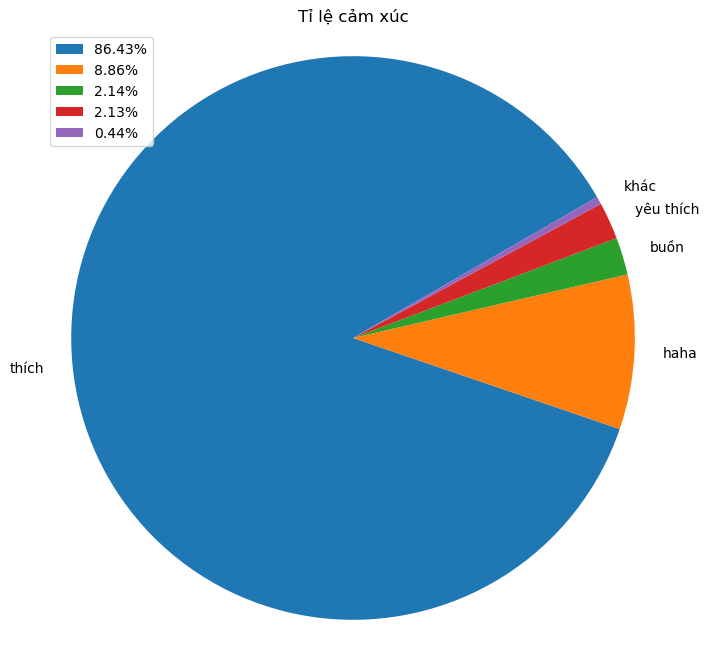

In [164]:
emotion_counts = {'thích': 0, 'yêu thích': 0, 'haha': 0, 'buồn': 0, 'khác': 0}

for reaction in df['reactions']:
    for emotion, count in reaction.items():
        if emotion == 'phẫn nộ' or emotion == 'wow' or emotion == 'thương thương':
            emotion_counts['khác']+= count
        else:
            emotion_counts[emotion] += count
emotion_counts = dict(sorted(emotion_counts.items(), key=lambda item: item[1], reverse=True))

labels = list(emotion_counts.keys())
values = list(emotion_counts.values())

plt.figure(figsize=(8, 8))
patches, _ = plt.pie(values, labels=labels, startangle=30)
plt.axis('equal') 
plt.title('Tỉ lệ cảm xúc')
percentages = ['{0:.2f}%'.format(val/sum(values)*100) for val in values]
plt.legend(patches, percentages, loc='best')

![](res/green.png)
## Biểu đồ số bài viết theo ngày

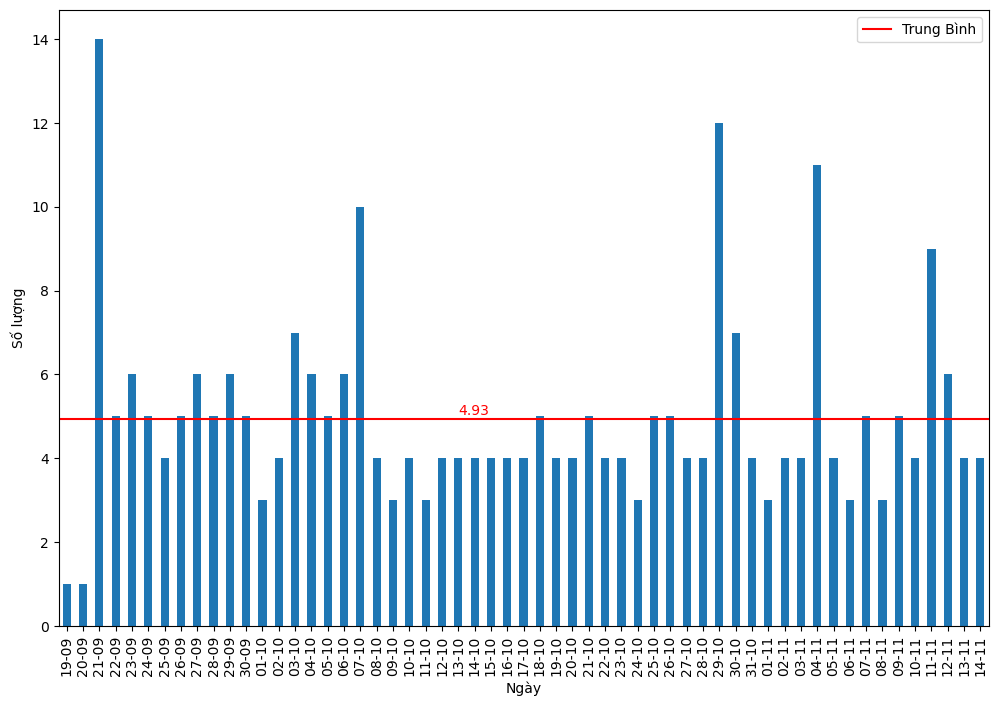

In [165]:
a = df.date.value_counts()
a.sort_index(inplace=True)
a.index = pd.to_datetime(a.index)
a.index = [date.strftime('%d-%m') for date in a.index]

plt.figure(figsize=(12,8))
a.plot(kind="bar", label="")
plt.axhline(y = a.mean(), color="red", label="Trung Bình")
plt.text(24, a.mean() + 0.1, f'{a.mean():.2f}', color='red') 
plt.ylabel("Số lượng")
plt.xlabel("Ngày")
plt.legend()

![](res/green.png)
## Biểu đồ phân phối số bài đăng theo số ngày

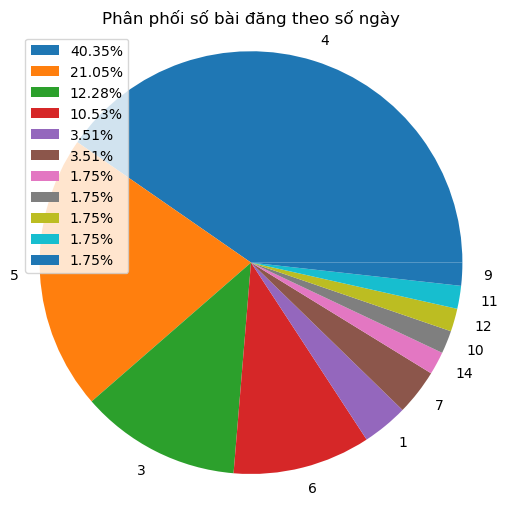

In [166]:
a = df.date.value_counts()
a.sort_index(inplace=True)
a.index = pd.to_datetime(a.index)
a.index = [date.strftime('%d-%m') for date in a.index]

# Tính tần suất xuất hiện
frequency = dict(Counter(a.values))
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

# Chuyển dữ liệu thành các danh sách phù hợp cho biểu đồ tròn
labels = list(frequency.keys())
sizes = list(frequency.values())

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
patches, _ = plt.pie(sizes, labels=labels, startangle=0)
plt.axis('equal') 
plt.title('Phân phối số bài đăng theo số ngày')
percentages = ['{0:.2f}%'.format(val/sum(sizes)*100) for val in sizes]
plt.legend(patches, percentages, loc='best')

![green-divider](res/green.png)
## Số lượng tương tác của các bài đăng theo thời gian

Text(140, 558.7722419928825, '529.77')

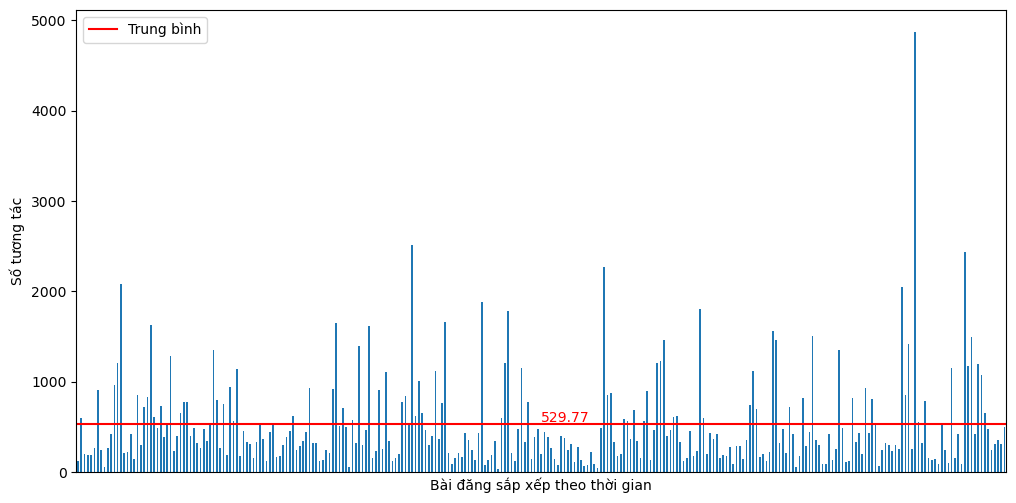

In [167]:
plt.figure(figsize=(12, 6))
df['engagement_summary'].plot(kind="bar", label="")
plt.xticks(ticks=[]) 
plt.xticks(rotation=45)
plt.axhline(y = df.engagement_summary.mean(), color = "r", label = "Trung bình")
plt.xlabel("Bài đăng sắp xếp theo thời gian")
plt.ylabel("Số tương tác")
plt.legend()
plt.text(140, df.engagement_summary.mean() + 29, f'{df.engagement_summary.mean():.2f}', color="r")

![green-divider](res/green.png)
## Tương quan giữa độ dài bài đăng và số lượt tương tác

Text(0, 0.5, 'Số tương tác')

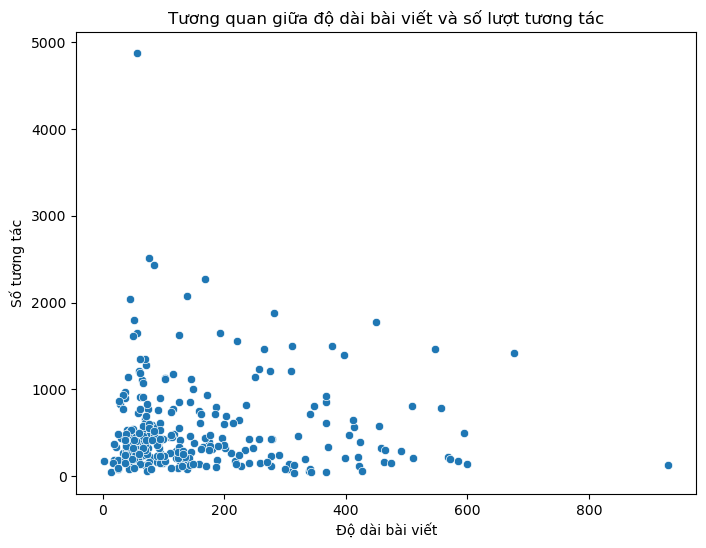

In [168]:
df['post_length'] = df['post_text'].apply(len)

engagement_vs_length = df[['post_length', 'engagement_summary']].corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='post_length', y='engagement_summary', data=df)
plt.title('Tương quan giữa độ dài bài viết và số lượt tương tác')
plt.xlabel('Độ dài bài viết')
plt.ylabel('Số tương tác')

In [169]:
n = 200
a = (df.post_length < n).sum()
print("Lượng bài đăng có độ dài <", n, "chiếm: ", a / df.shape[0] * 100, "%")

a = df[df.post_length < n].engagement_summary.sum()
b = df.engagement_summary.sum()
print("Lượng tương tác mà những bài đăng có độ dài <", n, "chiếm: ",a / b * 100, "%")

n = 400
a = (df.post_length < n).sum()
print("Lượng bài đăng có độ dài <", n, "chiếm: ", a / df.shape[0] * 100, "%")

a = df[df.post_length < n].engagement_summary.sum()
b = df.engagement_summary.sum()
print("Lượng tương tác mà những bài đăng có độ dài <", n, "chiếm: ",a / b * 100, "%")

Lượng bài đăng có độ dài < 200 chiếm:  72.59786476868328 %
Lượng tương tác mà những bài đăng có độ dài < 200 chiếm:  72.8742627597974 %
Lượng bài đăng có độ dài < 400 chiếm:  91.10320284697508 %
Lượng tương tác mà những bài đăng có độ dài < 400 chiếm:  91.85240417556729 %


![green-divider](res/green.png)
## Biểu đồ phân phối thời gian đăng bài theo giờ trong ngày

In [ ]:
df['time'] = pd.to_datetime(df['time']) 
df['hour'] = df['time'].dt.hour  

Text(0, 0.5, 'Số bài đăng')

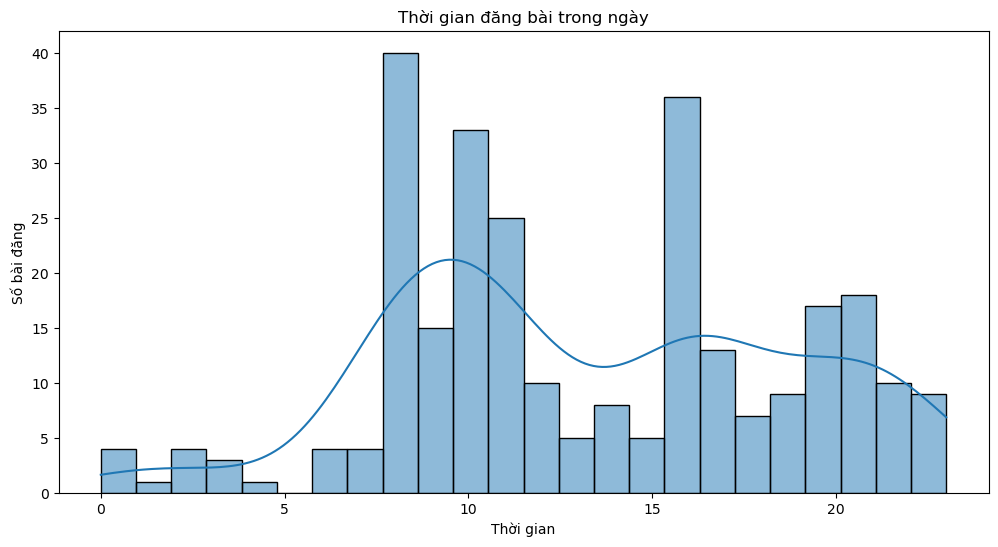

In [171]:
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=True)
plt.title('Thời gian đăng bài trong ngày')
plt.xlabel('Thời gian')
plt.ylabel('Số bài đăng')

![green-divider](res/green.png)
## Dự đoán trend bằng học máy

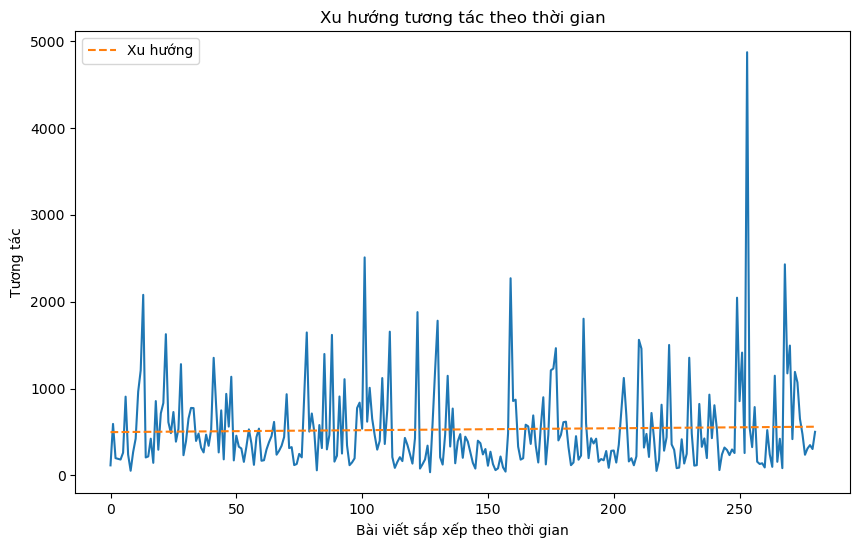

In [172]:
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = df.reset_index().index.values.reshape(-1, 1)
y = df['engagement_summary'].values

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán và trực quan hóa trend
predictions = model.predict(X)
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='')
plt.plot(df.index, predictions, label='Xu hướng', linestyle='--')
plt.title('Xu hướng tương tác theo thời gian')
plt.xlabel('Bài viết sắp xếp theo thời gian')
plt.ylabel('Tương tác')
plt.legend()
plt.show()

![green-divider](res/green.png)
### Những từ phổ biến trong comment của bài nhiều tương tác nhất

In [173]:
with open ("res/vietnamese-stopwords.txt", "r", encoding='utf-8') as file:
    VNSTOPWORDS = file.read().split("\n")
with open ("res/vietnamese_names.txt", "r", encoding='utf-8') as file:
    VNNAMES = file.read().split("\n")
VNSTOPWORDS = VNSTOPWORDS + VNNAMES

(-0.5, 1999.5, 1199.5, -0.5)

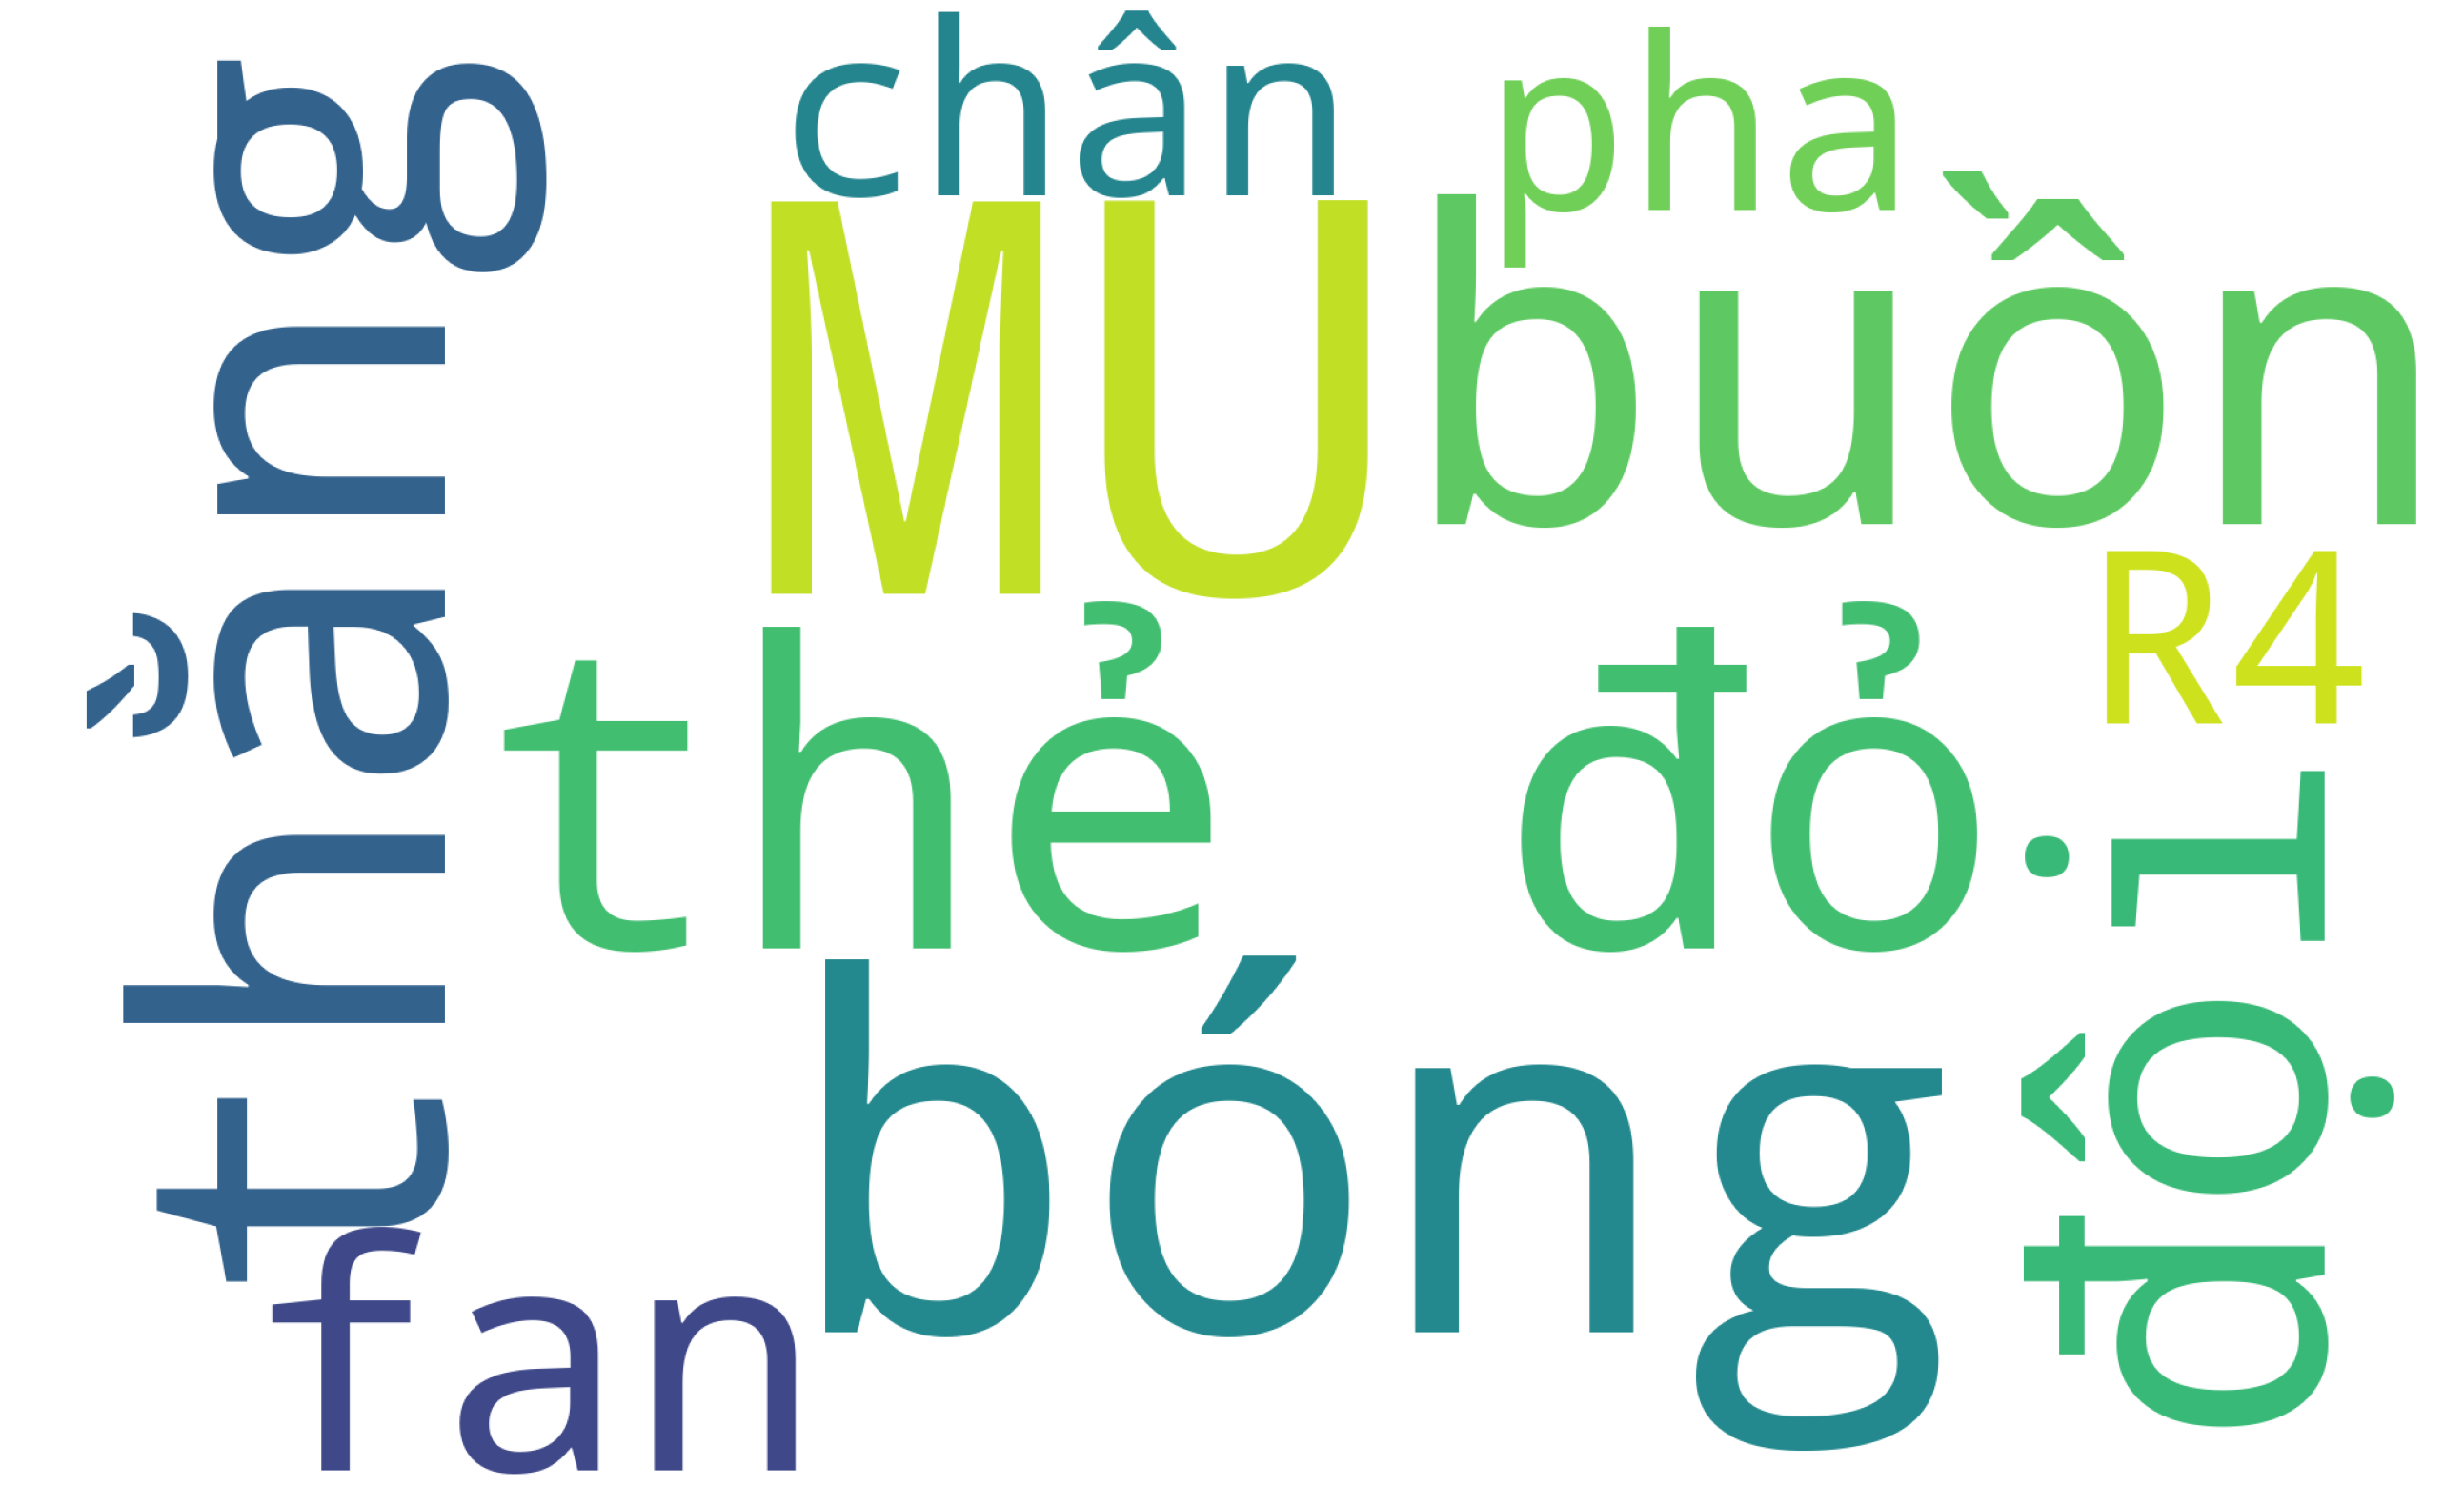

In [174]:
max_engagement_summary = df[df.engagement_summary == df.engagement_summary.max()].index[0]
df.index[max_engagement_summary]

wordcloud = WordCloud(stopwords=VNSTOPWORDS,
                          background_color='white', 
                      max_words=10,
                      width=2000, height=1200
                         ).generate(df.iloc[max_engagement_summary].comments_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

![](res/green.png)
## Những từ xuất hiện nhiều nhất trong các bài đăng

In [175]:
with open ("res/vietnamese-stopwords.txt", "r", encoding='utf-8') as file:
    VNSTOPWORDS = file.read().split("\n")
with open ("res/vietnamese_names.txt", "r", encoding='utf-8') as file:
    VNNAMES = file.read().split("\n")
VNSTOPWORDS = VNSTOPWORDS + VNNAMES

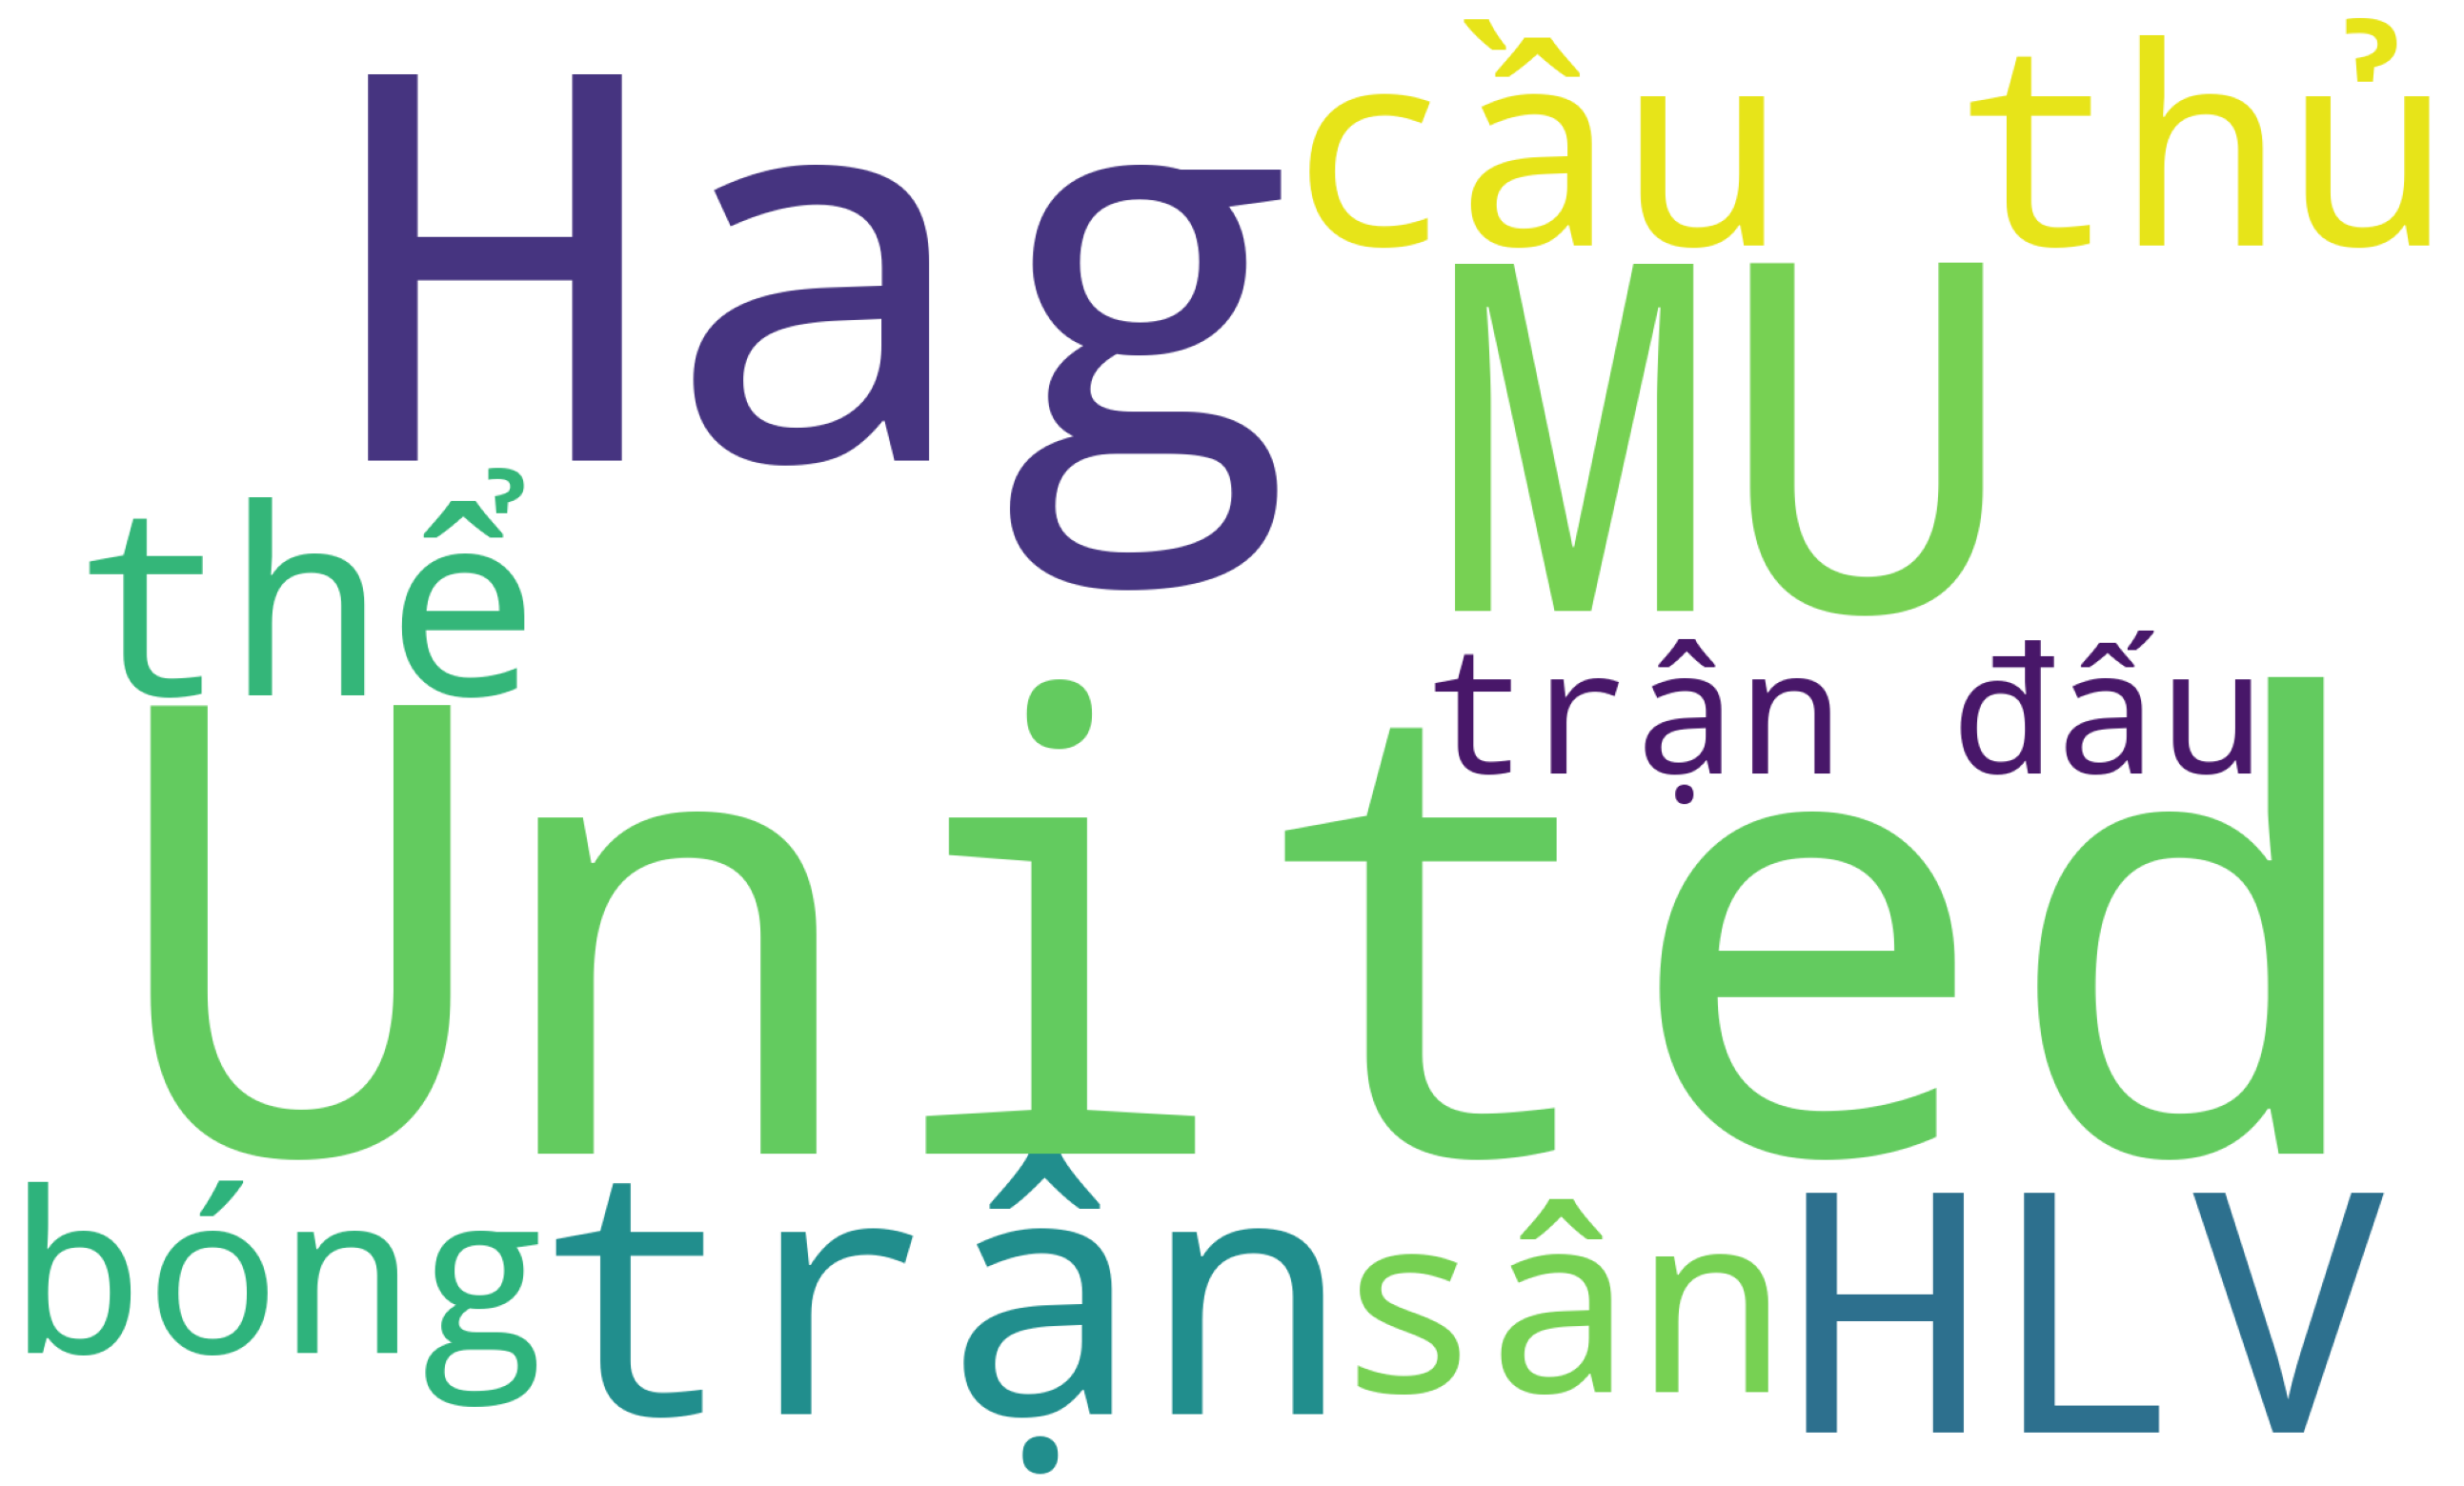

In [176]:
text = "".join(df.post_text)

wordcloud = WordCloud(stopwords=VNSTOPWORDS,
                          background_color='white', 
                      max_words=10,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![](res/green.png)
## Những từ phổ biến nhất trong tất cả các bình luận

In [177]:
with open ("res/vietnamese-stopwords.txt", "r", encoding='utf-8') as file:
    VNSTOPWORDS = file.read().split("\n")
with open ("res/vietnamese_names.txt", "r", encoding='utf-8') as file:
    VNNAMES = file.read().split("\n")
VNSTOPWORDS = VNSTOPWORDS + VNNAMES

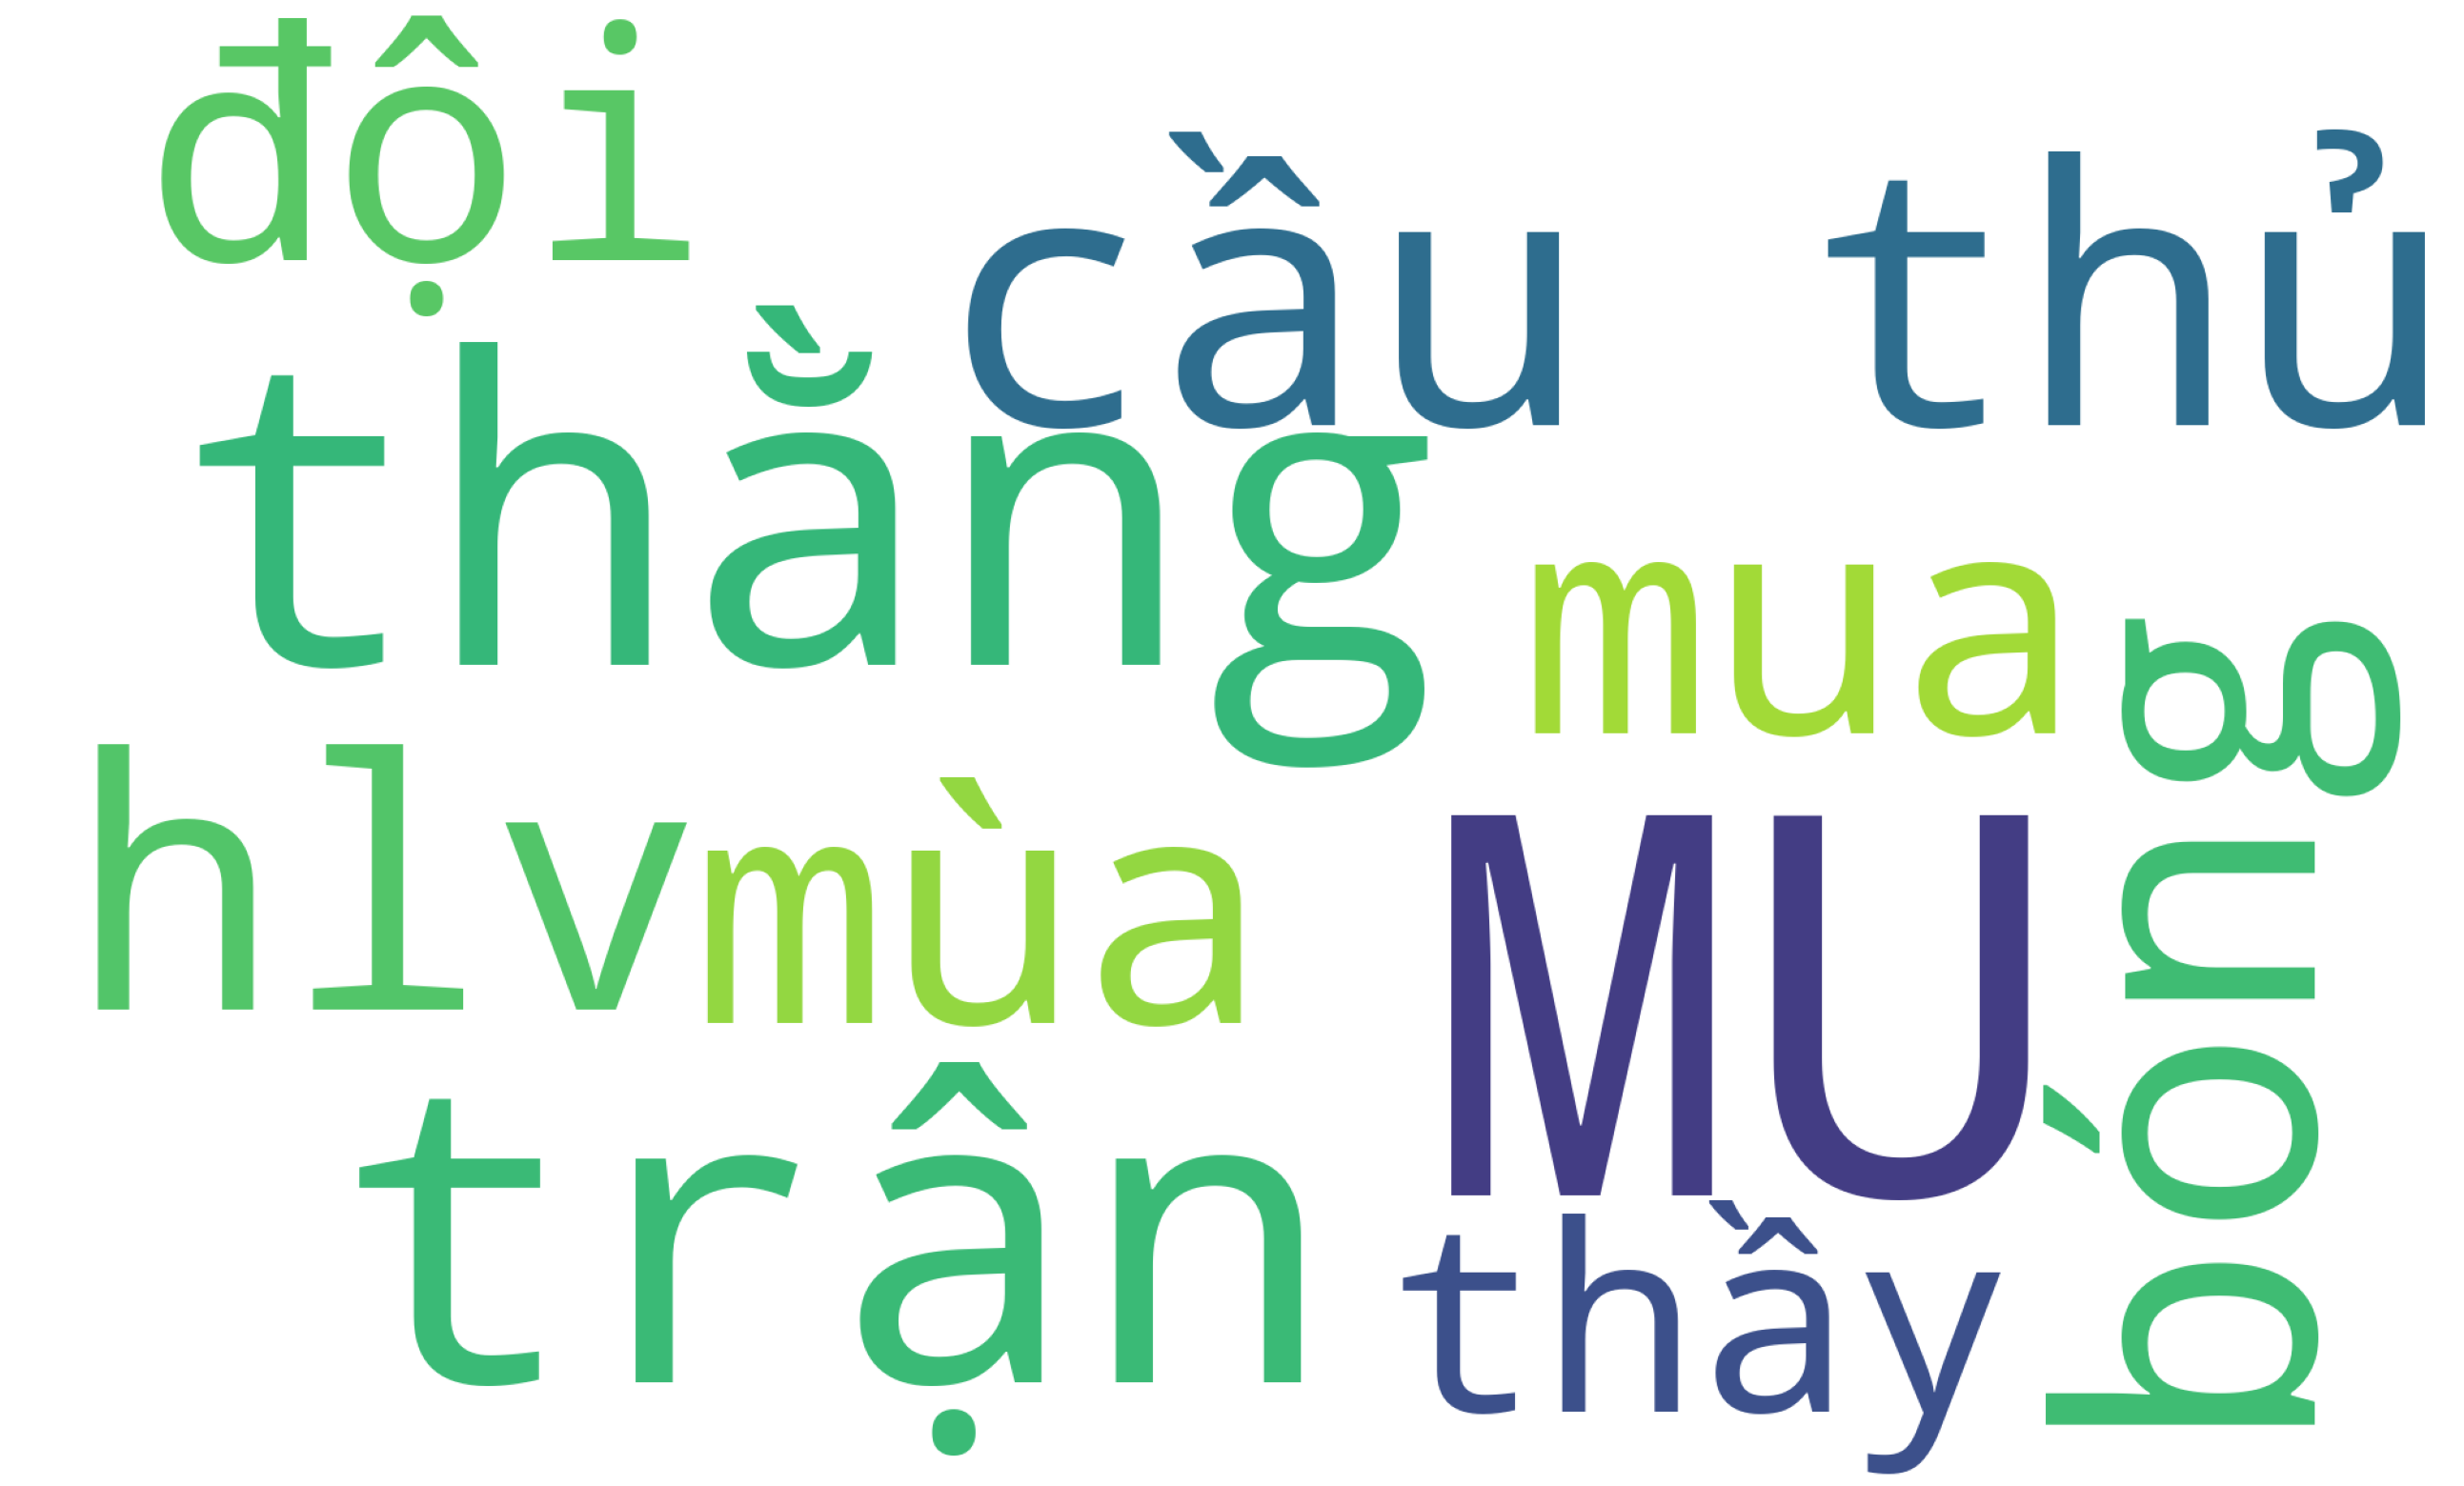

In [178]:
text = "".join(df.comments_text)

wordcloud = WordCloud(stopwords=VNSTOPWORDS,
                          background_color='white', 
                      max_words=10,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![](res/green.png)
## 5 bài đăng có ít lượt tương tác nhất

In [179]:
a = df.sort_values("engagement_summary").head()
a.post_text.values

array(['‼️Bruno Fernandes ở vòng loại Euro 2024\n▪️ Tạo ra nhiều cơ hội nhất (29)\n▪️ Ghi nhiều bàn thắng + kiến tạo nhất (11)\n▪️ Tạo ra nhiều cơ hội ngon ăn nhiều nhất (9)\n▪️ Kiến tạo nhiều nhất (7)\n\nBồ Đào Nha của Bruno Fernandes đã giành vé tham dự VCK Euro sớm trước 3 vòng đấu.\n\nMấy ông MU lên tuyển toàn cháy thật sự. 😤',
       '🗣Bruno Fernandes: "Với tư cách là cổ động viên, đôi khi thất vọng vì kết quả của đội là điều bình thường."\n\n🗣"Nhiệm vụ của chúng tôi, với tư cách là cầu thủ là làm cho họ vui, khiến họ đánh giá cao về trận đấu và đảm bảo rằng họ đi làm vui vẻ vào ngày hôm sau vì đội của họ đã thắng."\n\nHy vọng đêm nay các anh đừng khiến fan thật vọng nữa nhé!',
       'HLV Erik ten Hag xác nhận Casemiro dính chấn thương.\n\n▪️ "Ngay trước khi hiệp một kết thúc, cậu ấy dính chấn thương. Đó là lý do tại sao chúng tôi phải rút cậu ấy ra sân"\n\n▪️ "Tôi chưa rõ cậu ấy khi nào trở lại. Chúng tôi phải đợi 24 giờ, nhưng tôi nghĩ chắc chắn cậu ấy sẽ vắng mặt ở trận gặp Fu

In [180]:
for i in a.post_id:
    b = df1[df1.post_id == i]
    print(b.post_url.values)

['https://facebook.com/story.php?story_fbid=pfbid0Hxur78ne8rHfAAnDR7WkJ2Pdk3iBjsuTSyBTCnBmpPo24BrcpFywRUsScGbq8iHtl&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid02bU22NUWY4PzQT9nER2NiBEw3YFBakX3LSkNP6n5KwzRoS4ZiyUJkwuciAVtsiEt7l&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid052kKd1WjAg6ipuoBFJwajx7hdjv3UmQcdfJtH573ybGToZdQjvV42QTDPReh65Y5l&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid0GwB59Wb2ABeAGabsK7MHkLZHF5nK2Aq2HcwYDLZRdbPvGzPJAJkBCuHetX782Zsil&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid0dTEg8kJ2m9ABuZAqQdzDNk23QNCxGtZ42D2dWCjuXyQ14M7v9UFUaH5EKffyYDSil&id=100064820556285']


![](res/green.png)
## 5 bài đăng có nhiều lượt tương tác nhất

In [181]:
a = df.sort_values("engagement_summary", ascending=False).head(5)
a.post_text.values

array(['Hình ảnh của Bruno Fernandes sau trận thua Copenhagen. 🥹',
       'Bàn thắng đầy cảm xúc của Scott McTominay, níu kéo chiếc ghế của HLV Ten Hag',
       'Cầu thủ xuất sắc nhất trận đấu đêm qua, tháo băng đội trưởng anh đá khá biệt thật sự.',
       'Tin cực buồn: Sir Bobby Charlton cầu thủ bóng đá Anh vĩ đại nhất và cầu thủ vĩ đại nhất Manchester United qua đời ở tuổi 86.\n\nHãy yên nghỉ nhé ngài Bobby Charlton. ❤️🕊️',
       "🚨 Hãy dành một lời khen cho Reguilon.\n\nAnh mới đến đây chưa đầy 1 tháng, nhưng anh thi đấu như thể anh là một chú 'Quỷ Đỏ' chính hiệu vậy 🥰"],
      dtype=object)

In [182]:
for i in a.post_id:
    b = df1[df1.post_id == i]
    print(b.post_url.values)

['https://facebook.com/story.php?story_fbid=pfbid0L7dTqM4AVm4um6RLBhmy76MqXBWkXPZwjwEEMUuEcWFSSYpedAgNGp9ypbs3ZFLAl&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid034STGUvjAo6ERvc74G6WTEwM9xCpE7BjQbddrv62B6AQ7xa3Uv29U5d1NBcTe9hpWl&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid031cCdJsy2gwM75KU9QU8G16gYAouyo2ZKUYHbEh6iHK1xyPffcGts53VnCx6M8Kjcl&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid023YUEJSjWUwTQUbSUS8zqeFpnbmHDkT6NAAW7PPheCdpYQdZ16avcafEEAFEpGhr5l&id=100064820556285']
['https://facebook.com/story.php?story_fbid=pfbid092GoAfYwJupGcJRPfapyEuTJNV8pcSQEDhPWRaSdFBE5zv78UzFpMMq3zVJfn5R1l&id=100064820556285']


![purple-divider](res/purple.png)